# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Цель :** научиться определять рыночную стоимость объектов недвижимости.

**Входные данные сервиса Яндекс.Недвижимость** — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**План:**

* Обзор данных.
* Предобработка данных.
* Добавление необходимых столбцов в таблицу.
* Исследовательский анализ данных.

Откроем файл с данными и изучим общую информацию. 

In [1]:
#Импортируем библиотеку pandas и matplotlib. 
#Считаем данные из csv-файла в датафрейм и сохраним в переменную data

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
# Выведем первые 20 строчек датафрейм
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# Выведем сводную информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

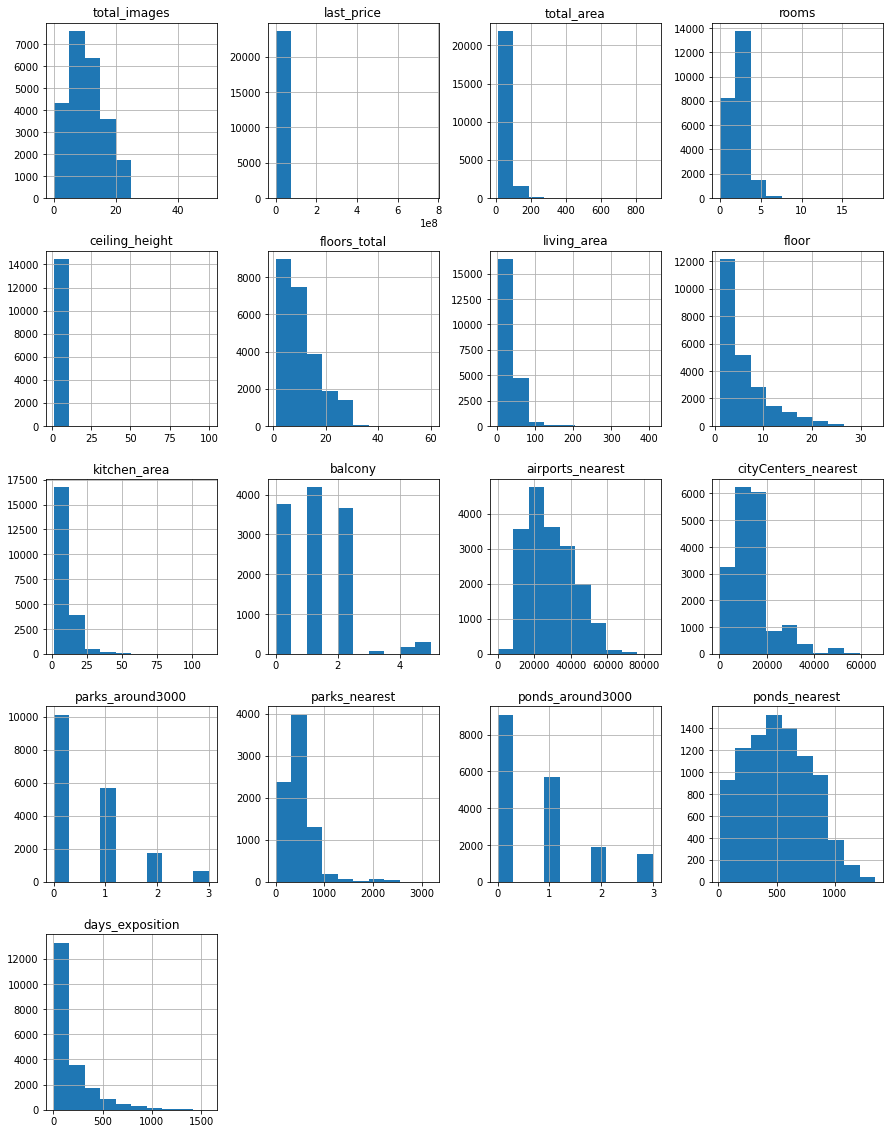

In [4]:
#Составим гистограммы по числовым данным
data.select_dtypes(['int', 'float']).hist(figsize=(15, 20))

plt.show()

In [5]:
amount_data_before_preprocessin = data.shape[0]
amount_data_before_preprocessin

23699

**Вывод:** в таблице 22 колонки и 23 699 строки 

**Колонки в которых есть все данные с нужным типом:**

 1 столбец **«total_images»**                   
 3 столбец **«total_area»**  
 5 столбец **«rooms»**
 
 9 столбец **«floor»**   
 11 столбец **«studio»**              
 12 столбец **«open_plan»**  
 
 **Колонки в которых есть проблемы:**
 
В 2 столбеце **«last_price»** тип данных 'float64'(необходимо изменить тип данных на 'int64') 

В 4 столбце **«first_day_exposition»**  тип данных 'object'(необходимо изменить тип данных на 'datetime')                   

В 6 столбце **«ceiling_height»** отсутствуют данные      
В 7 столбце **«floors_total»** отсутствуют данные,тип данных 'float64'(необходимо изменить тип данных на 'int64')       
В 8 столбце **«living_area»** отсутствуют данные                           
В 10 столбце **«is_apartment»** отсутствуют данные,тип данных 'float64'(необходимо изменить тип данных на 'bool')               

В 13 столбце **«kitchen_area»** отсутствуют данные         
В 14 столбце **«balcony»** отсутствуют данные, тип данных 'float64'(необходимо изменить тип данных на 'int64')               
В 15 столбце **«locality_name»** отсутствуют данные         
В 16 столбце **«airports_nearest»** отсутствуют данные   
В 17 столбце **«cityCenters_nearest»** отсутствуют данные

В 18 столбце **«parks_around3000»** отсутствуют данные, тип данных 'float64'(необходимо изменить тип данных на 'int64')     
В 19 столбце **«parks_nearest»** отсутствуют данные        
В 20 столбце **«ponds_around3000»** отсутствуют данные,тип данных 'float64'(необходимо изменить тип данных на 'int64')   
В 21 столбце **«ponds_nearest»** отсутствуют данные       
В 22 столбце **«days_exposition»** отсутствуют данные,тип данных 'float64'(необходимо изменить тип данных на 'int64')

**По гистограммам** есть аномальные значения, с которыми необходимо разобраться на следующих шагах

## Предобработка данных

### Обработка пропусков

In [6]:
#Выведем количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Из таблицы видно, что пропуски имеются в столбцах : ceiling_height, floors_total, living_area, is_apartment, kitchen_area , balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

**В таблице Data есть данные,которые могут быть заполнены логическим путем.** 

К таким данным относятся пропущенные значения в столбце с информацией о балконах,  если информация о балконах пропущена,то скорее всего их просто нет и эти значения можно заполнить 0.

Относитель столбца является недвижимость апартаментом или нет, при пропуске значения скорее всего объект не является апартаментом.

Пропуски в столбце locality_name и floors_total составляют малую часть данных, и их можно отбросить.

In [7]:
# Заполним пропущенные значения в столбце balcony 
data['balcony'] = data['balcony'].fillna(0)

In [8]:
#  Заполним пропущенные значения в столбце is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)

In [9]:
# Удалим данные в которых есть пропуски в 'locality_name', 'floors_total'
data = data.dropna(subset = ['locality_name', 'floors_total'])

In [10]:
# Проверим остались ли пустые значения в стобце balcony
data['balcony'].isna().sum()

0

In [11]:
# Проверим остались ли пустые значения в стобце is_apartment
data['is_apartment'].isna().sum()

0

In [12]:
# Проверим остались ли пустые значения в стобце locality_name
data['locality_name'].isna().sum()


0

In [13]:
# Проверим остались ли пустые значения в стобце floors_total
data['floors_total'].isna().sum()

0

**На этапе обработки пропусков:**
* Были обработы данные о балконах(а именно преоразовали отсутствие данных в 0, т.к. скорее всего у объекта их просто нет )
* Заполнили столбец апартаментов( отсутствие данных говорит, о том что данные не являются аппартаментами)
* Удалили данные в которые имеется пропуски в городе и общем количестве этажей в доме, так как может помешать для анализа

## Предобработка данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Данные в столбце first_day_exposition** должны иметь тип datetime64, т.к. это дата и правильный формат может пригодиться для дальнейших вычислений

**В столбцах floors_total, balcony, parks_around3000, ponds_around3000, days_exposition,last_price** - данные должны иметь тип int64, т.к. это всегда целые числа. 

**В столбце is_apartment** тип данных 'float64',необходимо изменить тип данных на 'bool', чтобы работать с булевым значением и сэкономить память.


In [15]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Типы данных в столбцах parks_around3000, ponds_around3000,days_exposition оставим без изменений, потому что  в этих данных присутствует большое количество пропусков, которые нельзя заменить логическими значениями и удалить нельзя из-за их большой доли в общем количестве данных.

**На этапе преобразования данных в нужный формат:**
* Данные в столбце first_day_exposition преобразовали в datetime64(т.к. это дата и правильный формат может пригодиться для дальнейших вычислений)
* В столбцах floors_total, balcony, parks_around3000, ponds_around3000, days_exposition,last_price  данные преобразовали в тип int64( т.к. это всегда целые числа)
* В столбце is_apartment изменили тип данных на 'boll'(чтобы работать с булевым значением и сэкономить память)

### Поиск и удаление дубликатов

In [16]:
# Проверяем наличие явных дубликатов
data.duplicated().sum()

0

В таблице data нет строк дубликатов,данные которых полностью дублируются в других

In [17]:
# Проверим какие уникальные данные указаны в столбце locality_name (название населённого пункта)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [18]:
# Выведем количество уникальных названий населённых пунктов
len(data['locality_name'].unique())

364

В таблице присутствуют неявные дубликаты:некоторые названия повторяются, но из-за разного написания букв 'е' и 'ё' не обнаруживаются при поиске явных дубликатов

In [19]:
data['locality_name'] = data['locality_name'].str.lower()

In [20]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')                         

In [21]:
len(data['locality_name'].unique())

330

In [22]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок ', regex=True)

In [23]:
len(data['locality_name'].unique())

330

Количество уникальных названий населённых пунктов уменьшилось на 34


In [24]:
# Проверяем наличие явных дубликатов
data.duplicated().sum()

0

**На этапе поиска и удаления дубликатов** явные дубликаты отсутствовали, но были обнаружены неявные дубликаты(34 шт), так как в данных из-за разного написания букв 'е' и 'ё' дублировались данные населенных пунктов. Все дубликаты были преобразованы и удалены

### Обработка аномальных значений

In [25]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Число фотографий квартиры** в объявлении находится в диапазоне от 0 до 50 выглядит правдопадно и на рассчеты нам не повлияет

**Цена на момент снятия с публикации** имеет большой разброс. Минимальное значение близится к 10 тыс., а максимально к 763 млн. Медиана от среднего сильно отличается. Построим гистограмму

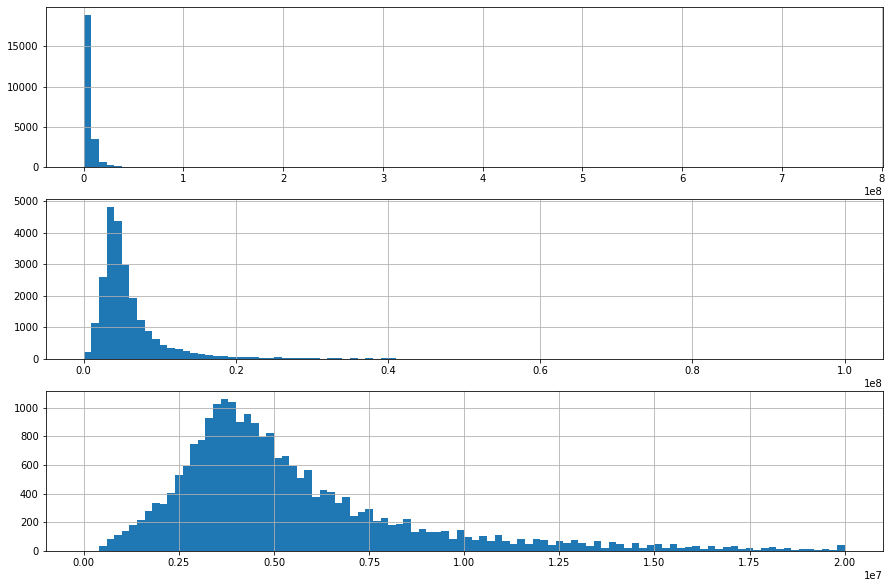

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

data['last_price'].hist(bins=100, ax=ax[0])
data['last_price'].hist(bins=100, range=(0, 1e8), ax=ax[1])
data['last_price'].hist(bins=100, range=(0, 0.2 * 1e8), ax=ax[2])

plt.subplots_adjust()
plt.show()

In [27]:
data.query('last_price> 1e8')['last_price'].count()

37

In [28]:
len(data)

23565

Возьмем только значения, которые меньше 100 000 000, так как после 100 000 000 присутствуют аномальные значения

In [29]:
data = data[data['last_price'] <= 1e8]

In [30]:
# Отсортируем по столбцу цена
data.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000,30.4,2019-04-22,1,NaN,2,16.0,1,False,...,6.0,0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000,54.0,2018-06-26,2,NaN,3,NaN,3,False,...,NaN,0,поселок станции свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000,40.0,2018-07-10,1,NaN,5,NaN,1,False,...,NaN,0,деревня старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9581,7,450000,43.4,2018-08-31,2,NaN,5,30.3,3,False,...,5.5,0,деревня старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0


В таблице видим выброс 12 тыс,возьмем значения которые больше

In [31]:
data = data[data['last_price']>100000]

In [32]:
# проверим что данные уменьшились 
len(data)

23527

**Общая площадь квартиры** в квадратных метрах (м²) имеет минимальное значение 12м² и максимальное 900м², что является логичные.  12 м² может быть студиями, а 900м² элитной недвижимостью. Посмотрим на гистаграмме частоту квартир с разными квадратными метрами.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

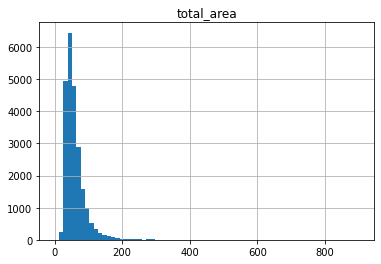

In [33]:
data.hist('total_area',bins=70, range=(0,900))

После значения 200 м² гистаграмма стремиться к 0. Стоит рассмотреть срез данных сколько квартир после значения 400 м².

In [34]:
data.query('total_area>400')['total_area'].count()

14

Данных более 400 м² немного(всего 14), их лучше удалить, так как они могут исказить другие рассчеты.

In [35]:
data = data[data['total_area'] <= 400]

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

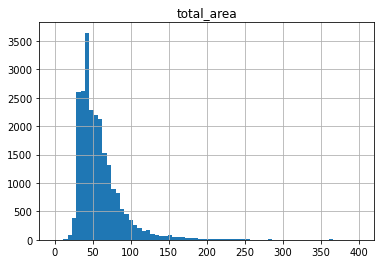

In [36]:
data.hist('total_area',bins=70, range=(0,400))

**Число комнат** варьируется от 0 до 19. 

0-могут быть студиями 

19-элитным жильем

<AxesSubplot:>

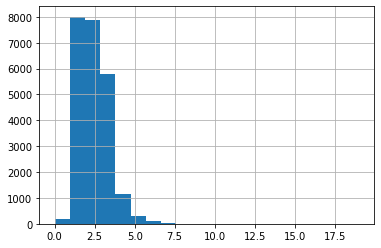

In [37]:
data['rooms'].hist(bins=20)

Видим аномальные значения из гистограммы 

<AxesSubplot:>

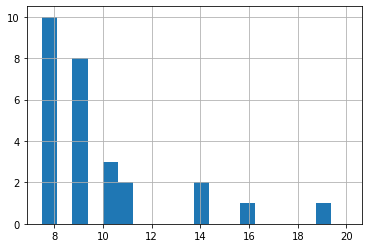

In [38]:
data['rooms'].hist(bins=20, range=(7.5,20))

In [39]:
len(data['rooms'])

23513

Значений комнат которых >= 10 крайне мало. Можно их удалить

In [40]:
data = data[data['rooms'] < 10]
len(data)

23504

**Высота потолков (м)** в зданиях от 1м до 100 м. 100 м явно аномалия, так как это приблизительно 33 этажа, сложно предтавить такой потолок. Независимо от года постройки и от типа здания, высота от пола до потолка должна быть в пределах 2,5-3,2 метров.

In [41]:
data[data['ceiling_height'] >= 4]['ceiling_height'].value_counts().sort_index()

4.00      38
4.06       1
4.10       3
4.14       1
4.15       1
4.19       2
4.20       9
4.25       1
4.30       1
4.37       1
4.40       3
4.45       1
4.50       7
4.70       1
4.80       1
5.00       1
5.20       1
5.30       1
5.50       1
5.60       1
5.80       1
8.00       3
8.30       1
10.30      1
14.00      1
20.00      1
22.60      1
24.00      1
25.00      7
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, dtype: int64

Удалим квартиры в которых потолки от 4м.  Потолки от 20 до 32м скорее всего содержат опечатку и необходимо разделить их на 10.

In [42]:
def new_ceiling_height(old_ceiling_height):
    if 20 <= old_ceiling_height <= 32:
        return old_ceiling_height / 10
    return old_ceiling_height


data['ceiling_height'] = data.ceiling_height.apply(new_ceiling_height).reset_index(drop=True)

In [43]:
data[data['ceiling_height'] >= 4]['ceiling_height'].value_counts().sort_index()

4.00      38
4.06       1
4.10       3
4.14       1
4.15       1
4.19       2
4.20       8
4.25       1
4.30       1
4.37       1
4.40       3
4.45       1
4.50       7
4.70       1
4.80       1
5.00       1
5.20       1
5.30       1
5.50       1
5.60       1
5.80       1
8.00       3
8.30       1
10.30      1
14.00      1
100.00     1
Name: ceiling_height, dtype: int64

In [44]:
data[data['ceiling_height'] < 2]['ceiling_height'].value_counts().sort_index()

1.00    1
1.20    1
1.75    1
Name: ceiling_height, dtype: int64

In [45]:
data = data[(data['ceiling_height'].between(2, 4))|(data['ceiling_height'].isna())]

**Всего этажей в доме** варьируется от 1 этажа до 60 этажей. Один этаж может быть в частном доме, 60 в многоэтажке.Но квартир в Санкт-Петербурге и соседних населённых пунктов c домами в которых этажей более 40 не существует, их надо удалить.

<AxesSubplot:>

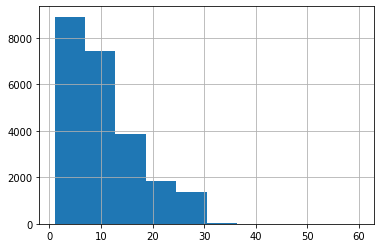

In [46]:
data['floors_total'].hist()

In [47]:
len(data)

23456

In [48]:
data = data[data['floors_total'] <  40]

In [49]:
len(data)

23454

**Жилая площадь в квадратных метрах (м²)** от 2 до 409.7 м².

<AxesSubplot:>

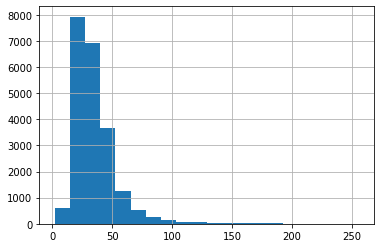

In [50]:
data['living_area'].hist(bins=20)

<AxesSubplot:>

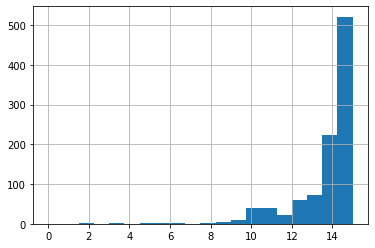

In [51]:
data['living_area'].hist(bins=20, range=(0,15))

Жилая площадь до 10 м² выглядит странно, также как и значения 200м². Удалим их.

In [52]:
data = data[(data['living_area'] >=11) & (data['living_area'] < 200)]

**Этаж** у недвижимости от 1 до 33

Этаж 0 0
Этаж 30+ 3
Этаж больше количества этажей:  0


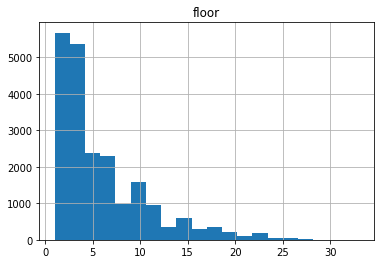

In [53]:
print('Этаж 0', data.query('floor == 0')['floor'].count())

print('Этаж 30+', data.query('floor > 30')['floor'].count())

print('Этаж больше количества этажей: ', data.query('floor > floors_total')['floor'].count())

data.hist('floor', bins=20);

Здесь нет нулевых значений и слишком больших значений. Оставляем данные без изменений. 

**Площадь кухни в квадратных метрах (м²)** у недвижимости от 1.3 до 112м²

<AxesSubplot:>

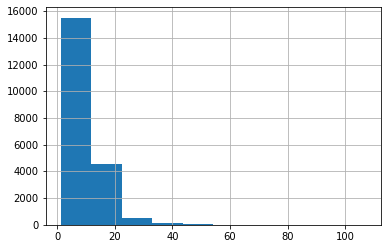

In [54]:
data['kitchen_area'].hist()

Кухня до 2 м² и от 43 м² выглядит как аномалия. Посчитаем их количество в данных и удалим после

In [55]:
print('Кухня до 2 м²',data.query('kitchen_area < 2')['kitchen_area'].count())

print('Кухня от 40м²',data.query('kitchen_area > 42')['kitchen_area'].count())

Кухня до 2 м² 1
Кухня от 40м² 81


In [56]:
len(data)

21510

In [57]:
#data = data[(data['kitchen_area']>=2)&(data['kitchen_area']<=42)]
data = data[data['kitchen_area'].between(2, 42) | data['kitchen_area'].isna()]

In [58]:
len(data)

21428

**Число балконов** от 0 до 5

<AxesSubplot:>

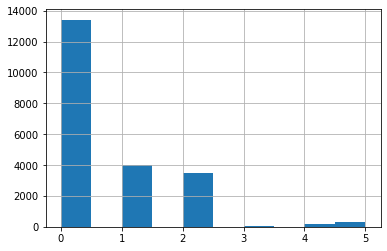

In [59]:
data['balcony'].hist()

4 и 5 балконов - вписывается в общую картину, аномалий нет

**Расстояние до ближайшего аэропорта в метрах (м)** от 0 до 84 869

<AxesSubplot:>

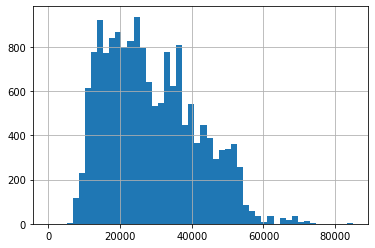

In [60]:
data['airports_nearest'].hist(bins=50)

Видим маленькое значение около 0, что странно, потому что строить слишком близко к аэропорту нельзя. Посмотрим на квартиры в пределах 1 км от аэропорта

In [61]:
data[data['airports_nearest'].between(0, 3000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.6,9,19.8,3,False,...,6.0,2,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Всего 1 квартира с расстоянием до 1000м до аэропорта, поэтому ее можно спокойно убрать.
Закон говорит, что меньше, чем 3км, от аэропорта жить нельзя.

Посмотрим на число данных с расстоянием до аэропорта от 3 до 10км

In [62]:
data[data['airports_nearest'].between(3000, 10000)].shape[0]

282

Уберем по порогу в 1км

In [63]:
data.shape[0]

21428

In [64]:
data = data[(data['airports_nearest'] >= 1000) | (data['airports_nearest'].isna())]
data.shape[0]

21427

**Расстояние до центра города (м)** 181 до 65 968

<AxesSubplot:>

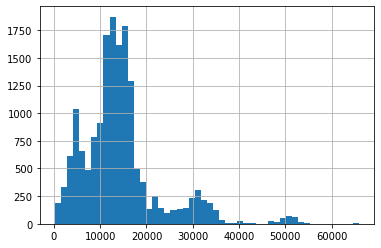

In [65]:
data['cityCenters_nearest'].hist(bins=50)

Аномалий не видно

**Число парков в радиусе 3 км** от 0 до 3

<AxesSubplot:>

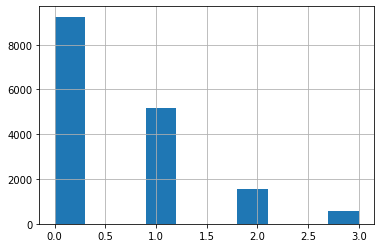

In [66]:
data['parks_around3000'].hist()

Значения в пределах нормы

**Расстояние до ближайшего парка (м)** от 1 до 3190

<AxesSubplot:>

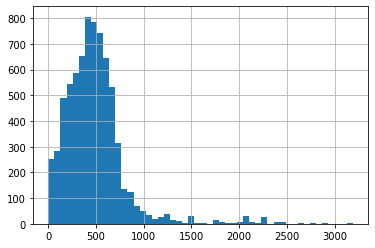

In [67]:
data['parks_nearest'].hist(bins=50)

Значения в пределах нормы

**Число водоёмов в радиусе 3 км** от 0 до 3

<AxesSubplot:>

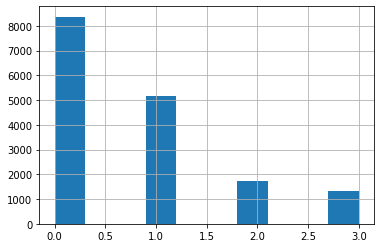

In [68]:
data['ponds_around3000'].hist()

**Расстояние до ближайшего водоёма (м)** от 13 до 1 344 м

<AxesSubplot:>

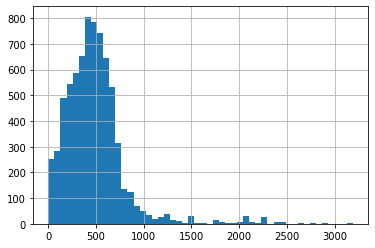

In [69]:
data['parks_nearest'].hist(bins=50)

In [70]:
data['parks_nearest'].quantile(0.01)

24.0

In [71]:
data[data['parks_nearest'] <= data['parks_nearest'].quantile(0.01)]['parks_nearest'].value_counts()

24.0    12
19.0     8
18.0     8
10.0     7
20.0     7
17.0     6
13.0     5
16.0     5
15.0     5
11.0     4
21.0     4
23.0     3
22.0     2
14.0     1
1.0      1
4.0      1
12.0     1
7.0      1
3.0      1
9.0      1
Name: parks_nearest, dtype: int64

В нижней 1% квантили у всех расстояние до 40м до водоема, что выглядит нереалистично, отбросим эти значения

In [72]:
data.shape[0]

21427

In [73]:
data = data[(data['parks_nearest'] >= data['parks_nearest'].quantile(0.01)) | data['parks_nearest'].isna()]

In [74]:
amount_data_after_preprocessin = data.shape[0]
amount_data_after_preprocessin

21356

In [75]:
amount_data_remained_after_preprocessing = amount_data_after_preprocessin * 100 / amount_data_before_preprocessin
amount_data_remained_after_preprocessing

90.11350689902528

После всех преобразований и удаления аномалий **можем проводить актуальный анализ, так как имеем не менее 90.00%** от изначального числа данных

**Вывод:**

**На этапе обработки пропусков:**
* Были обработы данные о балконах(а именно преоразовали отсутствие данных в 0, т.к. скорее всего у объекта их просто нет )
* Заполнили столбец апартаментов( отсутствие данных говорит, о том что данные не являются аппартаментами)
* Удалили данные в которые имеется пропуски в городе и общем количестве этажей в доме

**На этапе поиска и удаления дубликатов** явные дубликаты отсутствовали, но были обнаружены неявные дубликаты(34 шт), так как в данных из-за разного написания букв 'е' и 'ё' дублировались данные населенных пунктов. Все дубликаты были преобразованы и удалены

**На этапе обработки аномалий:**
* Данные по числу фотографий квартиры оставили без изменений
* Данные по цене на момент снятия с публикации имели большой разброс. Минимальное значение близилось к 10 тыс., а максимально к 763 млн. Медиана от среднего сильно отличалось. На основании гистограмы удалили данные , которые больше 100 000 000  и меньше 12 000(так как это явно выброс). 
* Данные по  площадь квартиры в квадратных метрах (м²) имели минимальное значение 12м² и максимальное 900м², что было логичным. 12 м² могло быть студиями, а 900м² элитной недвижимостью. Выявили, что  на гистаграмме значения 200 м² стремились к 0.  Поэтому удалили данные более 400 м²
* Данные по числу комнат варьировалось от 0 до 19. На основании гистаграммы принялли решения удалить данные которые были больше 9, так как они очень похожи на аномалию
* Данные по высоте потолков (м) преобразовали, так как  в зданиях от 1м до 100 м. 100 м явно была аномалией, так как это приблизительно 33 этажа, сложно предтавить такой потолок. Независимо от года постройки и от типа здания, высота от пола до потолка должна быть приблизительно в пределах 2,5-3,2 метров. Мы удалим квартиры в которых потолки от 4м. Потолки от 20 до 32м скорее всего содержали  опечатку и мы разделили их на 10. Потолки меньше 2м тоже были удалены
* Даные по общей сумме этажей в доме варьируется от 1 этажа до 60 этажей. Один этаж мог быть в частном доме, 60 в многоэтажке.Но квартир в Санкт-Петербурге и соседних населённых пунктов c домами в которых этажей более 40 не существует, их удалили
* Жилая площадь в квадратных метрах (м²) была 2 до 409.7 м². На основании гистограммы данные по жилой площади до 10 м² выглядили странно, также как и значения 200м². Мы удалили их.
* Этаж у недвижимости от 1 до 33. По гистограмме нет нулевых значений и слишком больших значений по данным о этажах. Оставили данные без изменений.
* Площадь кухни в квадратных метрах (м²) у недвижимости составляла от 1.3 до 112м².  Кухня до 2 м² и от 40 м² выглядело как аномалия на гистограмме.  Отредактировали данные и убрали данные до 2м² и от 40м²
* Число балконов Значения в пределах нормы
* Расстояние до ближайшего аэропорта в метрах (м) составляло от 0 до 84 869.  Построили гистограмму и убедились, что всего 1 квартира с расстоянием до 1000м до аэропорта, поэтому ее спокойно убрали. Закон говорит, что меньше, чем 3км, от аэропорта жить нельзя.
* Расстояние до центра города (м) 181 до 65 968. Оставли данные без изменений
* Число парков в радиусе 3 км от 0 до 3. Значения в пределах нормы, данные не удаляли
* Расстояние до ближайшего парка (м) от 1 до 3190.Значения в пределах нормы, данные не удаляли
* Число водоёмов в радиусе 3 км от 0 до 3.Значения в пределах нормы, данные не удаляли
* Расстояние до ближайшего водоёма (м) от 13 до 1 344 м. В нижней 1% квантили у всех расстояние до 40м до водоема, что выглядело нереалистично, отбросили эти значения

После всех преобразований и удаления аномалий **можем проводить актуальный анализ, так как имеем не менее 90.00%** от изначального числа данных


## Новые столбцы

 Посчитаем и добавим в таблицу новые столбцы

In [76]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,9.1,0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


**Цена одного квадратного метра** 

In [77]:
data['price_square_meter'] = round(data['last_price']/data['total_area'], 2)

**День недели публикации объявления**

In [78]:
data['day_week_published'] = data['first_day_exposition'].dt.weekday

**Месяц публикации объявления**

In [79]:
data['month_publication'] = data['first_day_exposition'].dt.month

**Год публикации объявления**

In [80]:
data['year_publication']= data['first_day_exposition'].dt.year

**Тип этажа квартиры**

In [81]:
def types_floor(x):
    if x['floor'] == 1:
        return "первый"
    elif x['floor'] == x['floors_total']:
        return "последний"
    else:
        return "другой"

In [82]:
data['type_floor'] = data.apply(types_floor, axis=1)

**Расстояние до центра города в километрах**


In [83]:
data['distance_city_center_km'] = round(data['cityCenters_nearest'] / 1000)

In [84]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_published,month_publication,year_publication,type_floor,distance_city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN


**Добавили новые столбцы в датафрейм**  для дальнейшего анализа этих параметров:
* цена одного квадратного метра;
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры ;
* расстояние до центра города в километрах.


## Исследовательский анализ данных

Посчитаем и добавим в таблицу новые столбцы

Изучим параметры объектов недвижимости:

In [85]:
data.shape

(21356, 28)

In [86]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_published,month_publication,year_publication,distance_city_center_km
count,21356.000000,2.135600e+04,21356.000000,21356.000000,12990.000000,21356.000000,21356.000000,21356.000000,20587.000000,21356.000000,...,16502.000000,7257.000000,16502.000000,8167.000000,18432.000000,21356.000000,21356.000000,21356.000000,21356.000000,16501.000000
mean,10.008101,6.073719e+06,58.988411,2.057267,2.718786,10.658784,33.937702,5.875023,10.249975,0.619451,...,0.601685,493.810390,0.758575,521.012612,183.974392,98084.546693,2.549354,6.425969,2017.353952,14.284286
std,5.665926,5.743622e+06,29.815976,1.033709,0.255220,6.555387,19.437480,4.854538,4.789163,0.968632,...,0.794993,337.045471,0.933137,277.323522,220.502003,40716.198483,1.780760,3.466182,1.044267,8.644821
min,0.000000,4.300000e+05,14.000000,0.000000,2.000000,1.000000,11.000000,1.000000,2.000000,0.000000,...,0.000000,24.000000,0.000000,13.000000,2.000000,9615.380000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,293.000000,0.000000,298.000000,44.000000,76923.080000,1.000000,3.000000,2017.000000,9.000000
50%,10.000000,4.620000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,456.000000,0.000000,505.000000,100.000000,94856.225000,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.800000,16.000000,42.100000,8.000000,11.800000,1.000000,...,1.000000,612.000000,1.000000,733.000000,237.000000,113461.540000,4.000000,10.000000,2018.000000,16.000000
max,50.000000,9.900000e+07,398.000000,9.000000,4.000000,37.000000,199.000000,33.000000,42.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,721518.990000,6.000000,12.000000,2019.000000,66.000000


In [87]:
data['type_floor'].value_counts()

другой       15709
последний     3019
первый        2628
Name: type_floor, dtype: int64

In [88]:
data['day_week_published'].value_counts()

3    3891
1    3818
4    3626
2    3577
0    3281
5    1683
6    1480
Name: day_week_published, dtype: int64

In [89]:
data['month_publication'].value_counts()

2     2338
3     2314
11    2214
4     2164
10    1976
9     1858
6     1584
8     1583
7     1507
12    1352
1     1287
5     1179
Name: month_publication, dtype: int64

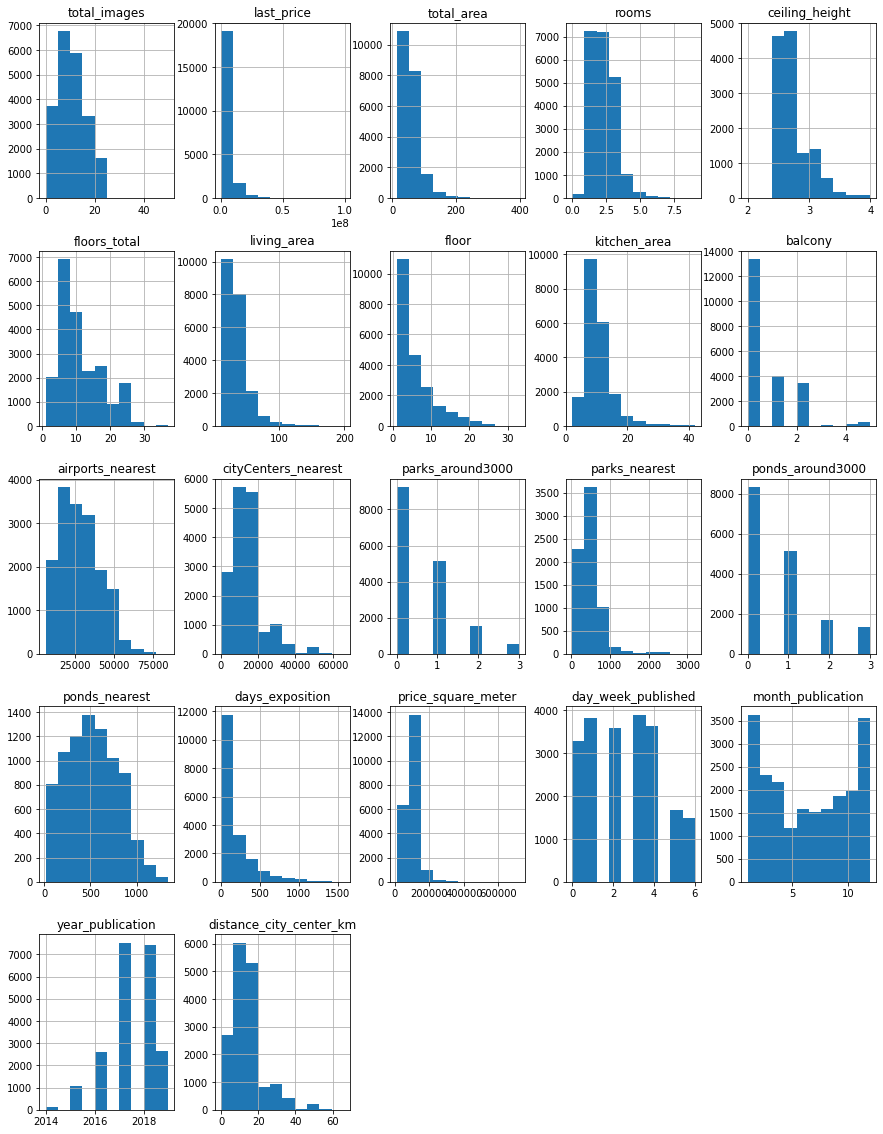

In [90]:
data.select_dtypes(['int', 'float']).hist(figsize=(15, 20))

plt.show()

<AxesSubplot:>

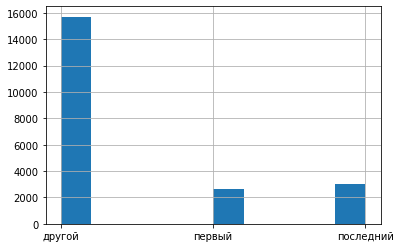

In [91]:
data['type_floor'].hist()

**Вывод**: 

Общее количество недвижимости после обработки аномалий составляет 21356.

Более детально изучим данные:

**общая площадь**: от 14м² до 373м², среднее значение 51м², а медиана 58м²

**жилая площадь**: от 11м² до 199м², среднее значение 30.0м², а медиана 33.8м²

**площадь кухни:** от 2м² до 42м²,среднее значение 9 м²,а медиана 10м²

**цена объекта:** от 4 300 000 до 95 000 000,среднее значение 4 600 000,а медиана около 6 млн

**количество комнат:** от 1 до 9 ,среднее значение 2,а медиана 2

**высота потолков:** от 2м до 4м,среднее значение 2.6,а медиана 2.7

**этаж квартиры:** от 1 до 33,среднее значение 4,а медиана 5

**тип этажа квартиры («первый», «последний», «другой»):** последний-2876, первый-2504,другой этаж - 14729

**общее количество этажей в доме:** от 1 до 37,среднее значение 9,а медиана 10

**расстояние до центра города в метрах:** от  181 до 65 000,среднее значение 13 149 ,а медиана 14 289

**расстояние до ближайшего аэропорта(m):** от 6 450 до 84 869,среднее значение 26 583,а медиана 28 737

**расстояние до ближайшего парка(m):** от 24 до 3 190,среднее значение 456,а медиана  492

**день публикации объявления:** в основном объявления размещались в четверг. Распределение количества объявлений по дням недели:
 - В четверг 3664 
 - Вторник 3583
 - Пятница 3410
 - Среда 3384
 - Понедельник 3099
 - Суббота 1584
 - Воскресенье 1385
 
**месяц публикации** объявления в основном размещались в феврале.Распределение количества объявлений по месяцам:
 - февраль 2213
 - март 2189
 - ноябрь 2068
 - апрель 2038
 - октябрь 1862
 - сентябрь 1756
 - июнь 1506
 - август 1485
 - июль 1414
 - декабрь 1290
 - январь 1191
 - май 1097

## Скорость продажи квартир

Проанализируем скорость продажи квартир

Рассмотрим более подробно как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

<AxesSubplot:>

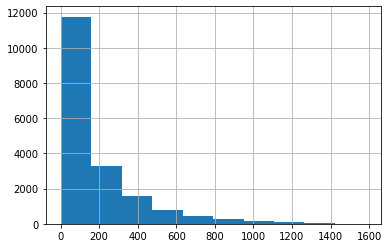

In [92]:
data['days_exposition'].hist()

Для более наглядного отображения изменим масштаб отображения гистограммы и увеличим количество корзин:

<AxesSubplot:>

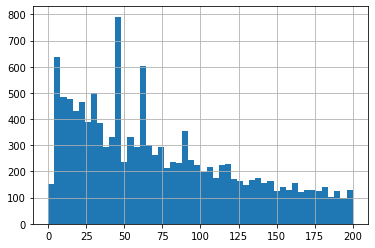

In [93]:
data['days_exposition'].hist(bins=50, range=(0, 200))

На гистограмме мы видим всплески

In [94]:
data['days_exposition'].value_counts().head(10)

45.0    537
60.0    343
7.0     210
30.0    203
4.0     170
3.0     151
5.0     141
14.0    137
90.0    135
20.0    134
Name: days_exposition, dtype: int64

Можно предположить, что чаще всего объекты недвижимости продавались на 45 и 60 день с момента размещения. Но было выявлено, что это может быть связано с условиями размещения объявлений в Яндекс.Недвижимости 

Посчитаем среднее и медиану по данным столбца days_exposition:

In [95]:
data['days_exposition'].agg(['mean','median'])

mean      183.974392
median    100.000000
Name: days_exposition, dtype: float64

In [96]:
data['days_exposition'].describe()

count    18432.000000
mean       183.974392
std        220.502003
min          2.000000
25%         44.000000
50%        100.000000
75%        237.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

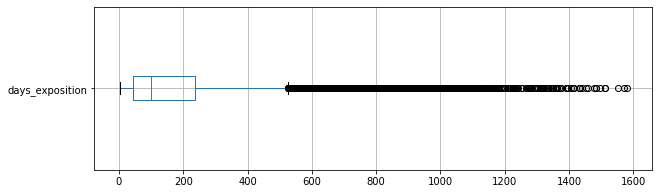

In [97]:
data.boxplot(column='days_exposition', grid=True, figsize=(10, 3), vert=False)

**Вывод:** Среднее время продажи квартиры составляет 183 дней. Медианное значение составляет 100 дней, что сильно отличается от среднего.
Быстрыми продажами можем называть данные которые меньше 25% (1 квартиля) до 44 дней, а к медленным можем отнести объявления больше 237 дней

## Факторы, влияющие на общую (полную) стоимость объекта

Изучим факторы, влияющие на общую (полную) стоимость объекта

 **Факторы, предположительно влияющие на общую (полную) стоимость объекта**
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

Более детально их изучим и установим влияют ли они на цену

In [98]:
round(data['last_price'].corr(data['total_area']), 2)

0.76

In [99]:
round(data['last_price'].corr(data['living_area']), 2)

0.67

In [100]:
round(data['last_price'].corr(data['kitchen_area']), 2)

0.55

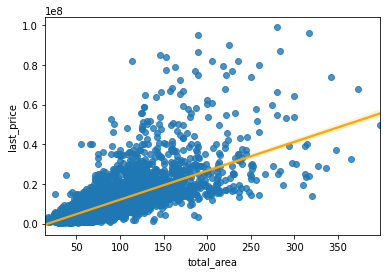

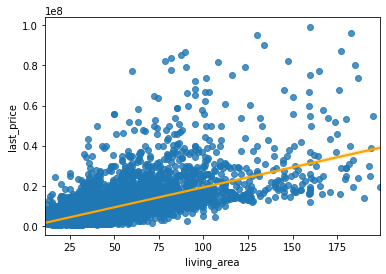

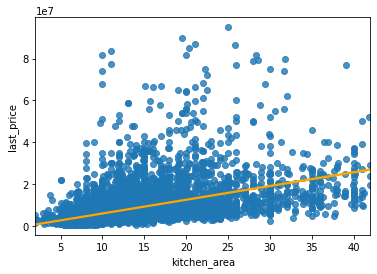

In [101]:
import seaborn as sns

sns.regplot(x='total_area', y='last_price', data=data, line_kws={"color": "orange"})
plt.show()

sns.regplot(x='living_area', y='last_price', data=data, line_kws={"color": "orange"})
plt.show()

sns.regplot(x='kitchen_area', y='last_price', data=data, line_kws={"color": "orange"})
plt.show()

In [102]:
round(data['last_price'].corr(data['rooms']), 2)

0.48

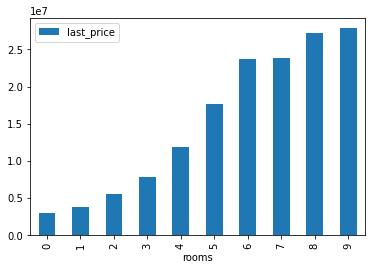

In [103]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

In [104]:
def categorize_type_floor(x):
    if x == 'первый':
        return 1
    elif x == 'другой':
        return 3
    else:
        return 2


data['type_floor_categorized'] = data['type_floor'].apply(categorize_type_floor)

In [105]:
round(data['last_price'].corr(data['type_floor_categorized']), 2)

0.08

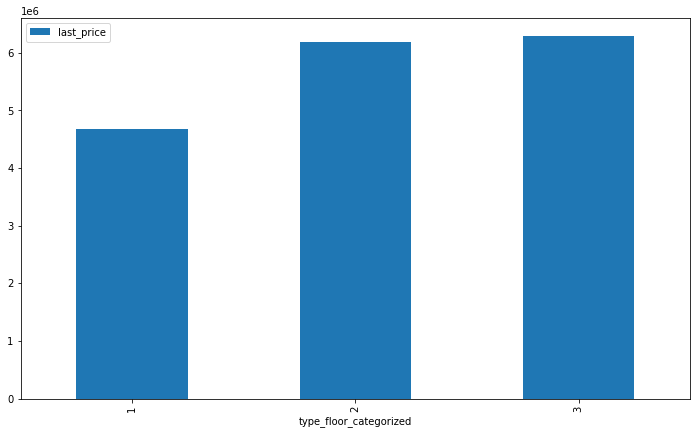

In [106]:
data.pivot_table(index='type_floor_categorized',values='last_price').plot(y='last_price', kind='bar', figsize=(12,7));

In [107]:
round(data['last_price'].corr(data['day_week_published']),3)

-0.008

<AxesSubplot:xlabel='day_week_published'>

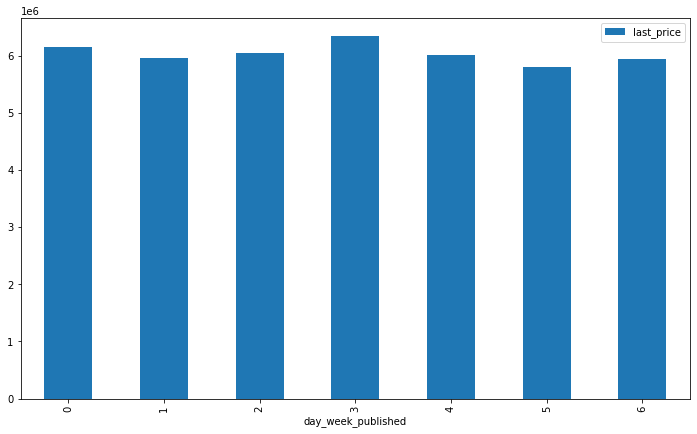

In [108]:

data.pivot_table(index='day_week_published',values='last_price').plot(
    y='last_price', kind='bar', figsize=(12,7))

In [109]:
round(data['last_price'].corr(data['month_publication']),3)

0.004

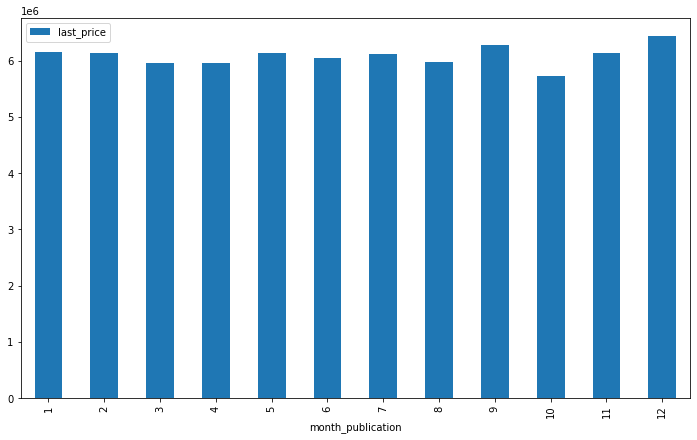

In [110]:
data.pivot_table(index='month_publication',values='last_price').plot(y='last_price', kind='bar', figsize=(12,7));

In [111]:
round(data['last_price'].corr(data['year_publication']),3)

-0.046

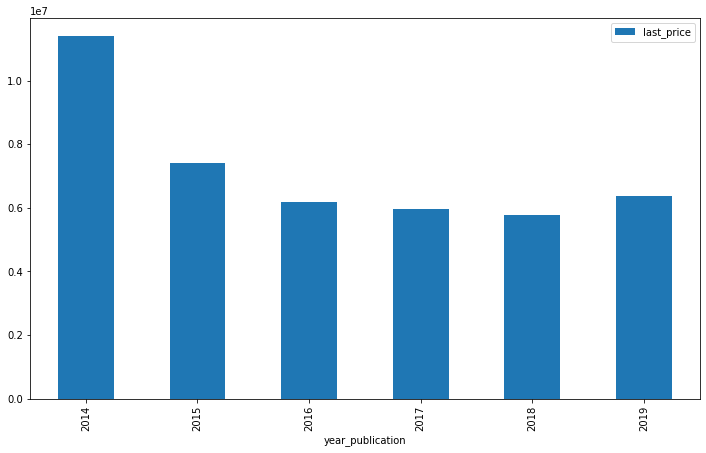

In [112]:
data.pivot_table(index='year_publication',values='last_price').plot(y='last_price', kind='bar', figsize=(12,7));

**Вывод:**

**Цена по убыванию зависит от:**

* общей площади;
* жилой площади;
* площади кухни;
* количества комнат.

**Цена практически на зависит от:**

* этажа, на котором расположена квартира;
* даты размещения( (день недели, месяц, год)

## Цена одного квадратного метра

Проанализируем цену одного квадратного метра

In [113]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_week_published,month_publication,year_publication,type_floor,distance_city_center_km,type_floor_categorized
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0,3
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0,1
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0,3
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0,3
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN,3


In [114]:
top_cities = (
    data
    .groupby('locality_name')['locality_name'].count()
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)
top_cities

['санкт-петербург',
 'поселок мурино',
 'поселок шушары',
 'всеволожск',
 'пушкин',
 'колпино',
 'поселок парголово',
 'гатчина',
 'деревня кудрово',
 'петергоф']

In [115]:
(
    data[data['locality_name'].isin(top_cities)]
    .groupby('locality_name')
    ['price_square_meter']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

locality_name
санкт-петербург      112388.06
пушкин               103449.76
деревня кудрово       92684.80
поселок парголово     90413.41
поселок мурино        86129.52
петергоф              84055.39
поселок шушары        78812.84
колпино               75374.92
всеволожск            68850.08
гатчина               68627.36
Name: price_square_meter, dtype: float64

**Вывод:** самая дорогая недвижимость в Санкт-Петербурге.В топ-10 входят ближайшие к Санкт-Петербургу города. 

А именно:

* Пушкин              
* деревня Кудрово
* поселок Парголово
* поселок Мурино
* Колпино
* Всеволожск
* Гатчина
* Выборг
    

Проанализируем стоимость объектов в зависимости от расстояния до центра в километрах:

In [116]:
(
    data
    .query('locality_name=="санкт-петербург"')
    .groupby('distance_city_center_km')
    ['price_square_meter'].mean()
    .round())

distance_city_center_km
0.0     219578.0
1.0     146791.0
2.0     149613.0
3.0     119587.0
4.0     126837.0
5.0     133212.0
6.0     142186.0
7.0     151824.0
8.0     123804.0
9.0     112836.0
10.0    111302.0
11.0    108425.0
12.0    107298.0
13.0    107802.0
14.0    103806.0
15.0    103941.0
16.0    100206.0
17.0     97183.0
18.0     96676.0
19.0     98354.0
20.0    102200.0
21.0     91397.0
22.0     89660.0
23.0     90791.0
24.0     86001.0
25.0     90168.0
26.0     87823.0
27.0    132116.0
28.0     81162.0
29.0     72953.0
Name: price_square_meter, dtype: float64

<AxesSubplot:xlabel='distance_city_center_km'>

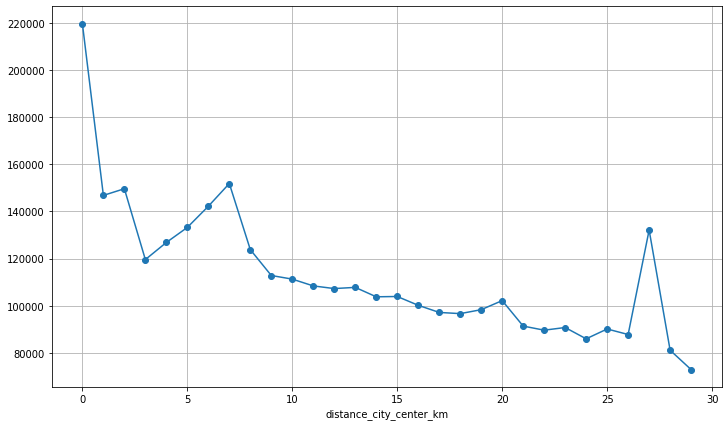

In [117]:
(
    data
    .query('locality_name=="санкт-петербург"')
    .groupby('distance_city_center_km')
    ['price_square_meter'].mean()
    .round()
    .plot(style='o-', grid=True, figsize=(12,7))
)

**Вывод:** Стоимость объектов в зависимости от расстояния до центра в километрах:в целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности от 4 до 7 и на 27 километре от центра наблюдается рост цен квадратного метра, это может быть связано с другими факторами, такими как тип дома, качество его строительства, средняя площадь квартир, доступность к транспорту и т.д.

## Общий вывод

Для исследования объявлений о продаже квартир мы проанализировали данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

До предобработки объем данных составлял 23699 строк, который в процессе обработки сократился до 21356 строк.

**На этапе обработки пропусков:**
* Были обработы данные о балконах(а именно преоразовали отсутствие данных в 0, т.к. скорее всего у объекта их просто нет )
* Заполнили столбец апартаментов( отсутствие данных говорит, о том что данные не являются аппартаментами)
* Удалили данные в которые имеется пропуски в городе и общем количестве этажей в доме, так как может помешать для анализа

**На этапе преобразования данных в нужный формат:**

* Данные в столбце first_day_exposition преобразовали в datetime64(т.к. это дата и правильный формат может пригодиться для дальнейших вычислений)
* В столбцах floors_total, balcony, parks_around3000, ponds_around3000, days_exposition,last_price данные преобразовали в тип int64( т.к. это всегда целые числа)
* В столбце is_apartment изменили тип данных на 'bool'(чтобы работать с булевым значением и сэкономить память)

**На этапе поиска и удаления дубликатов** явные дубликаты отсутствовали, но были обнаружены неявные дубликаты(34 шт), так как в данных из-за разного написания букв 'е' и 'ё' дублировались данные населенных пунктов. Все дубликаты были преобразованы и удалены

**На этапе обработки аномалий:**
* Данные по числу фотографий квартиры оставили без изменений
* Данные по цене на момент снятия с публикации имели большой разброс. Минимальное значение близилось к 10 тыс., а максимально к 763 млн. Медиана от среднего сильно отличалось. На основании гистограмы удалили данные , которые больше 100 000 000  и меньше 12 000(так как это явно выброс). 
* Данные по  площадь квартиры в квадратных метрах (м²) имели минимальное значение 12м² и максимальное 900м², что было логичным. 12 м² могло быть студиями, а 900м² элитной недвижимостью. Выявили, что  на гистаграмме значения 200 м² стремились к 0.  Поэтому удалили данные более 400 м²
* Данные по числу комнат варьировалось от 0 до 19. На основании гистаграммы принялли решения удалить данные которые были больше 9, так как они очень похожи на аномалию
* Данные по высоте потолков (м) преобразовали, так как  в зданиях от 1м до 100 м. 100 м явно была аномалией, так как это приблизительно 33 этажа, сложно предтавить такой потолок. Независимо от года постройки и от типа здания, высота от пола до потолка должна быть приблизительно в пределах 2,5-3,2 метров. Мы удалим квартиры в которых потолки от 4м. Потолки от 20 до 32м скорее всего содержали  опечатку и мы разделили их на 10. Потолки меньше 2м тоже были удалены
* Даные по общей сумме этажей в доме варьируется от 1 этажа до 60 этажей. Один этаж мог быть в частном доме, 60 в многоэтажке.Но квартир в Санкт-Петербурге и соседних населённых пунктов c домами в которых этажей более 40 не существует, их удалили
* Жилая площадь в квадратных метрах (м²) была 2 до 409.7 м². На основании гистограммы данные по жилой площади до 10 м² выглядили странно, также как и значения 200м². Мы удалили их.
* Этаж у недвижимости от 1 до 33. По гистограмме нет нулевых значений и слишком больших значений по данным о этажах. Оставили данные без изменений.
* Площадь кухни в квадратных метрах (м²) у недвижимости составляла от 1.3 до 112м².  Кухня до 2 м² и от 40 м² выглядело как аномалия на гистограмме.  Отредактировали данные и убрали данные до 2м² и от 42м²
* Число балконов было от 0 до 5. 
* Расстояние до ближайшего аэропорта в метрах (м) составляло от 0 до 84 869.  Построили гистограмму и убедились, что всего 1 квартира с расстоянием до 1000м до аэропорта, поэтому ее спокойно убрали. Закон говорит, что меньше, чем 3км, от аэропорта жить нельзя.
* Расстояние до центра города (м) 181 до 65 968. Оставли данные без изменений
* Число парков в радиусе 3 км от 0 до 3. Значения в пределах нормы, данные не удаляли
* Расстояние до ближайшего парка (м) от 1 до 3190.Значения в пределах нормы, данные не удаляли
* Число водоёмов в радиусе 3 км от 0 до 3.Значения в пределах нормы, данные не удаляли
* Расстояние до ближайшего водоёма (м) от 13 до 1 344 м. В нижней 1% квантили у всех расстояние до 40м до водоема, что выглядело нереалистично, отбросили эти значения

**Добавили новые столбцы в датафрейм для дальнейшего анализа этих параметров:**

* цена одного квадратного метра;
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры ;
* расстояние до центра города в километрах.

**Среднее время продажи квартиры составило 183 дней.**   
Медианное значение составляет 100 дней, что сильно отличается от среднего.
Быстрыми продажами можем называть данные которые меньше 25% (1 квартиля) до 44 дней, а к медленным можем отнести объявления больше 237 дней

**Факторы, влияющие на общую (полную) стоимость объекта**

* общей площади;
* жилой площади;
* площади кухни;
* количества комнат.

**Цена практически не зависит от:**

* этажа, на котором расположена квартира;
* даты размещения( (день недели, месяц, год)

**Самая дорогая недвижимость в Санкт-Петербурге.** В топ-10 входят ближайшие к Санкт-Петербургу города. 

А именно:

* Пушкин              
* деревня Кудрово
* поселок Парголово
* поселок Мурино
* Колпино
* Всеволожск
* Гатчина
* Выборг

Стоимость объектов в зависимости от расстояния до центра в километрах:в целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности от 4 до 7 и на 27 километре от центра наблюдается рост цен квадратного метра, это может быть связано с другими факторами, такими как тип дома, качество его строительства, средняя площадь квартир, доступность к транспорту и т.д.


